**Project : Diabetes Prediction**

Aim :- Predict whether a person will be diagnosed with diabetes or not.


----------------------
Import the Libraries

In [18]:
# Importing the Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [19]:
dataset = pd.read_csv('/content/diabetes.csv')
# Printing First 5 rows
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# Printing the last 5 rows
print(dataset.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [21]:

print("Dataset Length : ",len(dataset))

Dataset Length :  768


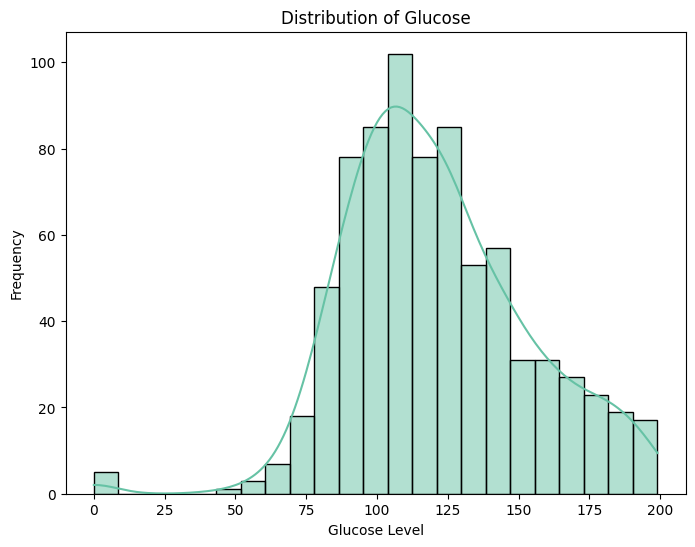

In [22]:

# Set custom color palettes
custom_palette = sns.color_palette("Set2")  # Use Seaborn's "Set2" color palette

# Distribution of Glucose
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Glucose'], kde=True, color=custom_palette[0])
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose')
plt.show()

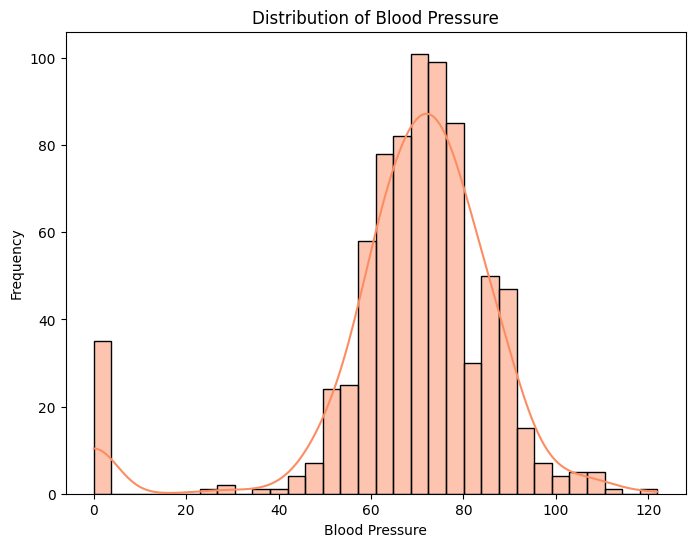

In [23]:
# Distribution of Blood Pressure
plt.figure(figsize=(8, 6))
sns.histplot(dataset['BloodPressure'], kde=True, color=custom_palette[1])
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Pressure')
plt.show()


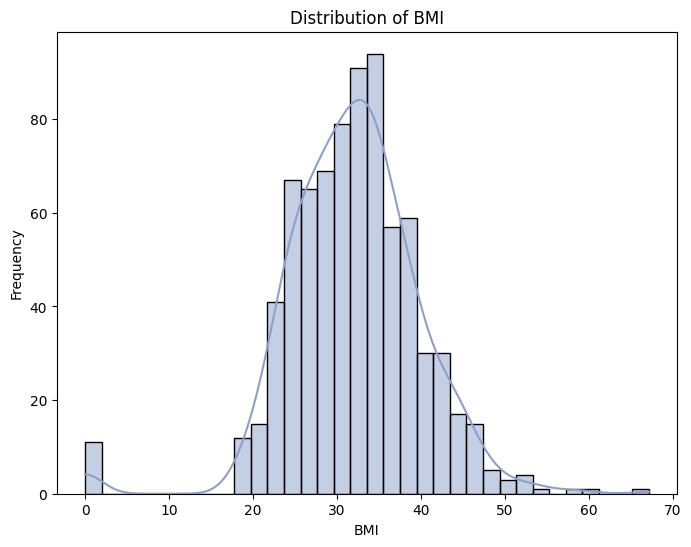

In [24]:
# Distribution of BMI
plt.figure(figsize=(8, 6))
sns.histplot(dataset['BMI'], kde=True, color=custom_palette[2])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

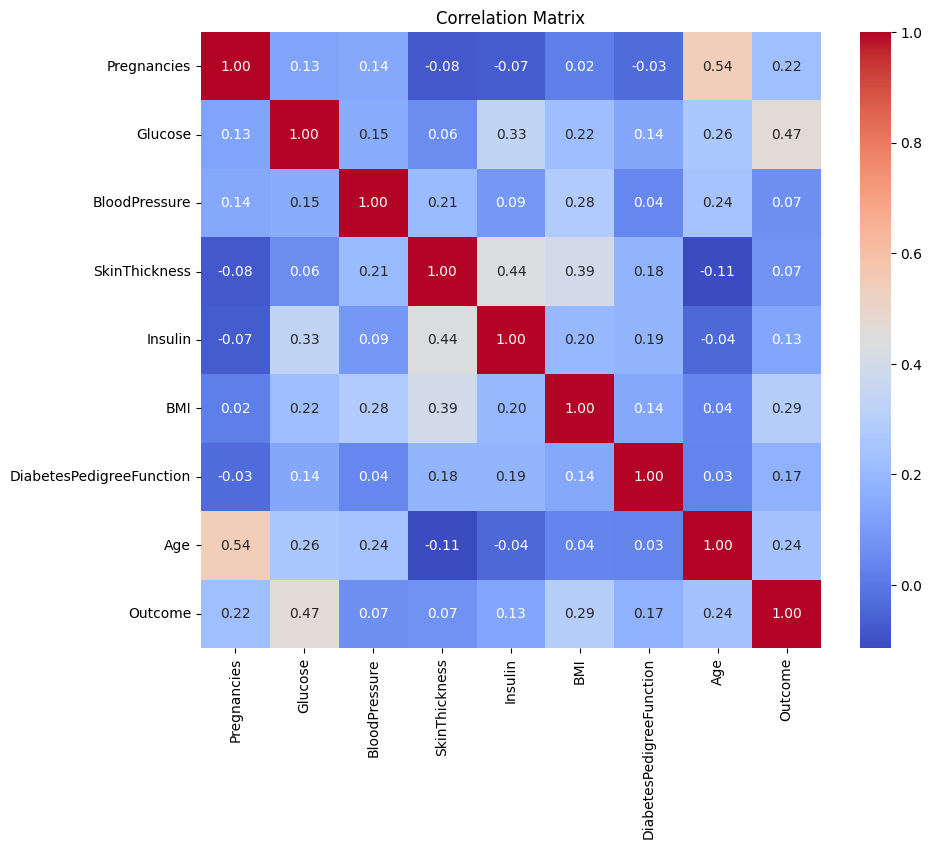

In [25]:
# Correlation matrix
correlation_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


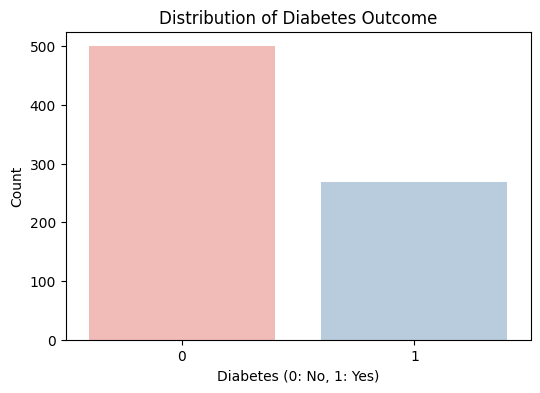

In [26]:
# Outcome distribution
outcome_palette = sns.color_palette("Pastel1")  # Use Seaborn's "Pastel1" color palette
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Outcome', palette=outcome_palette)
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')
plt.show()

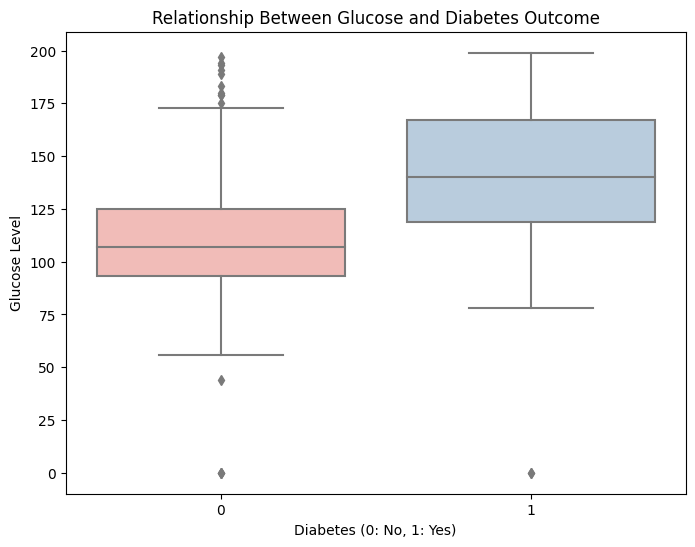

In [27]:
# Relationship between Glucose and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Outcome', y='Glucose', palette=outcome_palette)
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Glucose Level')
plt.title('Relationship Between Glucose and Diabetes Outcome')
plt.show()

Values of columns like 'Glucose', 'BloodPressure' cannot be accepted as zeroes because it will affect the outcome
We can replace such values with the mean of respective column.

In [28]:
# Replace Zeroes
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

# Here we are replacing numpy with NaN which means it does not exist
for column in zero_not_accepted :
  dataset[column] = dataset[column].replace(0, np.NaN)
  mean = int(dataset[column].mean(skipna = True))
  dataset[column] = dataset[column].replace(np.NaN, mean)


In [29]:
# Split dataset into train and test
X = dataset.iloc[:, 0:8]
Y = dataset.iloc[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0, test_size = 0.2)

In [30]:
# Rule of thumb : Any algorithm that computes distance or assumes normality, scale your features!
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
# Define the model : Init - KNN
classifier = KNeighborsClassifier(n_neighbors=11, p = 2, metric = 'euclidean')
classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
#it's important to evaluate model
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[94 13]
 [15 32]]


In [34]:
print(f1_score(Y_test, y_pred))

0.6956521739130436


In [35]:
print(accuracy_score(Y_test, y_pred))

0.8181818181818182


So, we have created a model using KNN which can predict whether a person will have diabetes or not.

And accuracy of 80% tells us that, it is a pretty fair fit in the model!

In [36]:
# take input array like :
#	1	85	66	29	0	26.6	0.351	31
# 	6	148	72	35	0	33.6	0.627	50
# 4 34 53 87 1 98.87 0.789 88
# # Below line read inputs from user using map() function
print("Enter the report data like : Pregnancies |	Glucose |	BloodPressure |	SkinThickness |	Insulin |	BMI |	DiabetesPedigreeFunction | Age ")

input_data=list(map(float, input("elements of array:-").strip().split()))

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, 8)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 1):
  print('The Person is healthy and does not have a Diabetes.')
else :
  print('The Person has a Diabetes.')

Enter the report data like : Pregnancies |	Glucose |	BloodPressure |	SkinThickness |	Insulin |	BMI |	DiabetesPedigreeFunction | Age 
elements of array:-87 6 57 76 4 86 87 45
[1]
The Person is healthy and does not have a Diabetes.
